In [2]:
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [81]:
df = pd.read_csv('data/ga_sessions.csv', low_memory=False, index_col=0)
df.head()

,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
session_id,,,,,,,,,,,,,,,,,
9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [82]:
df.shape

(1860042, 17)

In [83]:
df.duplicated().sum()

np.int64(0)

In [84]:
df_copy = df.copy()

In [85]:
df_copy.isnull().sum().sort_values(ascending=False)

device_model                1843704
utm_keyword                 1082061
device_os                   1070138
device_brand                 367178
utm_adcontent                335615
utm_campaign                 219603
utm_source                       97
geo_country                       0
device_browser                    0
device_screen_resolution          0
client_id                         0
device_category                   0
visit_date                        0
utm_medium                        0
visit_number                      0
visit_time                        0
geo_city                          0
dtype: int64

In [86]:
def null_percentage(df):
    null_count = df.isnull().sum()
    return null_count / len(df) * 100

null_percentage(df_copy).sort_values(ascending=False)

device_model                99.121633
utm_keyword                 58.174009
device_os                   57.533002
device_brand                19.740307
utm_adcontent               18.043410
utm_campaign                11.806346
utm_source                   0.005215
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
client_id                    0.000000
device_category              0.000000
visit_date                   0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
geo_city                     0.000000
dtype: float64

In [87]:
df.utm_keyword.describe()

count                   777981
unique                    1219
top       puhZPIYqKXeFPaUviSjo
freq                    506819
Name: utm_keyword, dtype: object

In [88]:
df.utm_adcontent.describe()

count                  1524427
unique                     286
top       JNHcPlZPxEMWDnRiyoBf
freq                   1006599
Name: utm_adcontent, dtype: object

In [89]:
df.utm_campaign.describe()

count                  1640439
unique                     412
top       LTuZkdKfxRGVceoWkVyg
freq                    463481
Name: utm_campaign, dtype: object

In [90]:
df_copy.device_os.describe()

count      789904
unique         13
top       Android
freq       464054
Name: device_os, dtype: object

In [91]:
df_copy.device_os.unique()

array(['Android', nan, 'iOS', 'Windows', 'Linux', 'Macintosh',
       '(not set)', 'Chrome OS', 'BlackBerry', 'Tizen', 'Firefox OS',
       'Samsung', 'Windows Phone', 'Nokia'], dtype=object)

In [92]:
df_copy.device_brand.unique()

array(['Huawei', 'Samsung', 'Xiaomi', 'Apple', 'Lenovo', nan, 'Vivo',
       'Meizu', 'OnePlus', '(not set)', 'BQ', 'Realme', 'OPPO', 'itel',
       'Philips', 'Nokia', 'Alcatel', 'LG', 'Tecno', 'Asus', 'Infinix',
       'Sony', 'ZTE', 'Wiko', 'Google', 'Micromax', 'Blackview',
       'Oukitel', 'Wileyfox', 'Motorola', 'HOMTOM', 'Cubot', 'DOOGEE',
       'China Phone', 'DEXP', 'Neffos', 'TP-Link', 'Hisense', 'Acer',
       'Vsmart', 'BlackBerry', 'Umidigi', 'Leagoo', 'Highscreen',
       'Ulefone', 'HTC', 'Symphony', 'LeEco', 'Prestigio', 'POCO',
       'Vestel', 'Guophone', 'Vertex', 'CAT', 'InFocus', 'TCL',
       'SonyEricsson', 'Inoi', 'Nomu', 'Sharp', 'Jiake', 'ZOJI', 'Yuntab',
       'Mozilla', 'Vernee', 'Tele2', 'H96', 'Kyocera', 'Karbonn', 'BLU',
       'Haier', 'Kingplay', 'Coolpad', 'MTC', 'LeTV', 'iNew', 'A1',
       'Gionee', 'General Mobile', 'Digma', 'Yota Devices', 'Gome',
       'Egreat', 'Kata', 'Mito', 'Poptel', 'Flylion', 'AGM', 'SenseIT',
       'Archos', 'Teclast',

In [93]:
df_copy.device_os.value_counts().sort_values(ascending=False)

device_os
Android          464054
iOS              207104
Windows           88307
Macintosh         24824
Linux              5120
(not set)           364
Chrome OS            83
BlackBerry           27
Tizen                 7
Samsung               4
Windows Phone         4
Firefox OS            3
Nokia                 3
Name: count, dtype: int64

In [94]:
df.device_brand.describe()

count     1492864
unique        205
top         Apple
freq       551088
Name: device_brand, dtype: object

In [95]:
# Заполняем utm_keyword, utm_adcontent, utm_content самым часто встречающимся значением
df_copy.utm_keyword = df_copy.utm_keyword.fillna(int(df.utm_keyword.value_counts().iloc[0]))
df_copy.utm_adcontent = df_copy.utm_adcontent.fillna(int(df.utm_adcontent.value_counts().iloc[0]))
df_copy.utm_campaign = df_copy.utm_campaign.fillna(int(df.utm_campaign.value_counts().iloc[0]))
# Все строки с нулевым значением utm_source можем удалить, так как это слишком маленький процент от всей выборки
df_copy = df_copy[df_copy.utm_source.notnull()]
# Столбец device_model мы удалим, так как процент пропущенных значений слишком велик, так же как и столбцы с значениями, которые мы в дальнейшем не будем использовать для предсказаний
df_copy = df_copy.drop(['device_model', 'client_id', 'visit_date', 'visit_time', 'visit_number'], axis=1)
# Пропущенные значения в device_brand заполним как other
df_copy.device_brand = df_copy.device_brand.fillna('other')
# Так как страна, на которой мы распространяем продукт - Россия

In [96]:
# Заполняем столбец device_os, основываясь на производителе устройства. (Это можно отнести в создание фич, но мне кажется6 что оно уместнее будет здесь)

android_brands = [
    'Huawei', 'Samsung', 'Xiaomi', 'Lenovo', 'Vivo', 'Meizu', 'OnePlus',
    'Realme', 'OPPO', 'itel', 'Tecno', 'Infinix', 'ZTE', 'Wiko', 'Google',
    'Micromax', 'Blackview', 'Oukitel', 'Motorola', 'HOMTOM', 'Cubot',
    'DOOGEE', 'DEXP', 'Neffos', 'Hisense', 'Umidigi', 'Leagoo', 'Ulefone',
    'HTC', 'LeEco', 'Prestigio', 'POCO', 'TCL', 'Inoi', 'Nomu', 'Vernee',
    'BLU', 'Haier', 'Coolpad', 'Gionee', 'Digma', 'Archos', 'Black Fox',
    'Lava', 'Condor', 'Honor', 'Redmi', 'InFocus', 'Sharp', 'BQ', 'Philips',
    'Nokia', 'Alcatel', 'Sony', 'Wileyfox', 'Fairphone', 'Vsmart', 'AGM',
    'UMI', 'ThL', 'Xgody', 'Mobiistar', 'Evertek', 'Vertex', 'Jiayu',
    'Leegoog', 'Smartisan', 'Chuwi', 'Walton', 'Xiaolajiao', 'myPhone'
]

pc_brands = [
    'Dell', 'HP', 'Acer', 'MSI', 'Toshiba', 'Fujitsu', 'Panasonic',
    'Medion', 'Clevo', 'Vaio', 'IBM', 'Framework', 'System76', 'Gateway',
    'Digma', 'Teclast', 'Chuwi', 'Dell', 'Fujitsu', 'Medion', 'Clevo',
    'Vaio', 'IBM', 'Framework', 'System76', 'Gateway', 'Digma', 'Teclast'
]

def classify_device(row):
    brand = row['device_brand']

    if brand in pc_brands:
        return 'PC'
    if brand == 'Apple':
        return 'iOS'
    elif brand in android_brands:
        return 'Android'
    else:
        return 'other'

df_copy['device_os'] = df_copy.apply(classify_device, axis=1)

In [97]:
df_copy.isnull().sum().sort_values(ascending=False)

utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

In [98]:
df_copy.dtypes

utm_source                  object
utm_medium                  object
utm_campaign                object
utm_adcontent               object
utm_keyword                 object
device_category             object
device_os                   object
device_brand                object
device_screen_resolution    object
device_browser              object
geo_country                 object
geo_city                    object
dtype: object

In [99]:
df_copy.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
session_id,,,,,,,,,,,,
9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,463481,NOBKLgtuvqYWkXQHeYWM,506819,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,463481,1006599,506819,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow


In [100]:
df_copy.columns

Index(['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country',
       'geo_city'],
      dtype='object')

In [101]:
df_copy.device_os.value_counts().sort_values(ascending=False)

device_os
Android    911933
iOS        551078
other      396792
PC            142
Name: count, dtype: int64

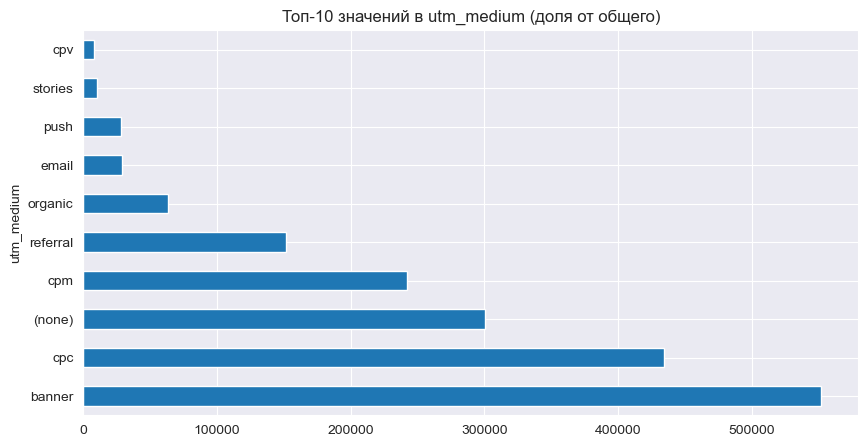

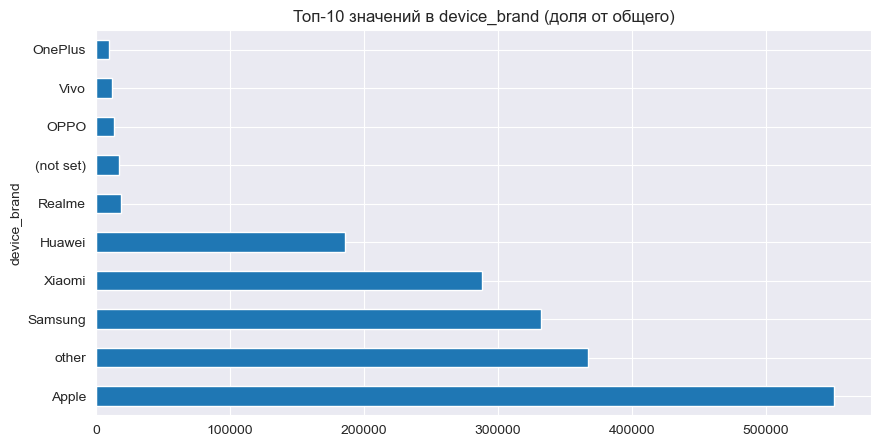

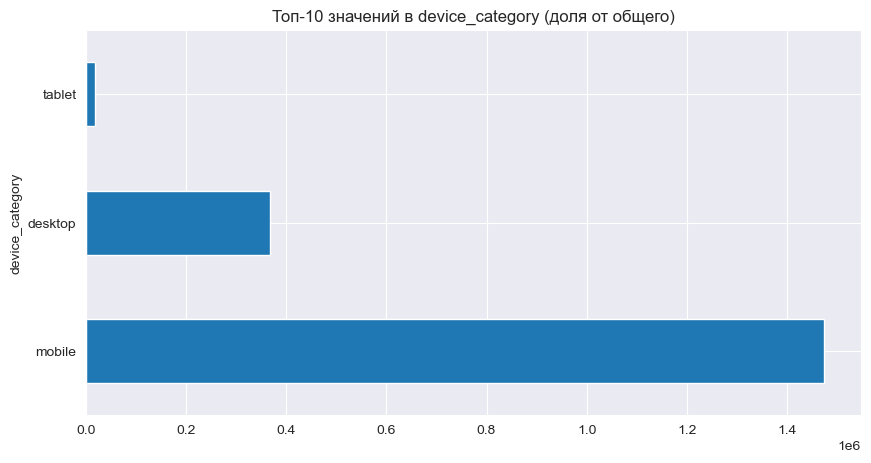

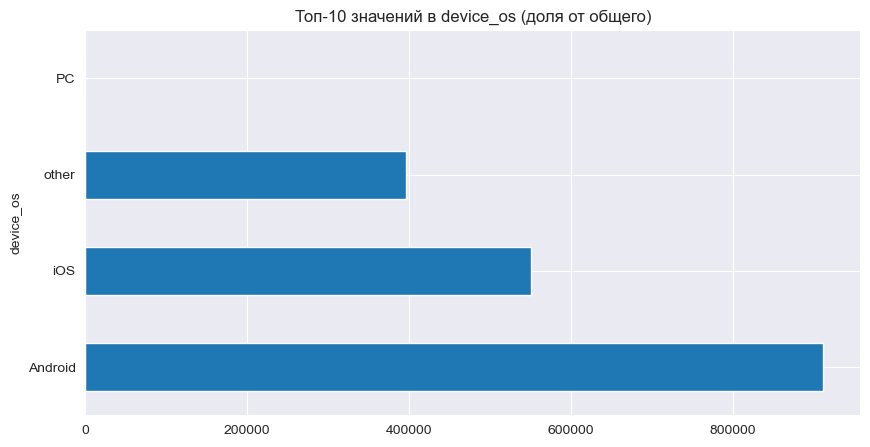

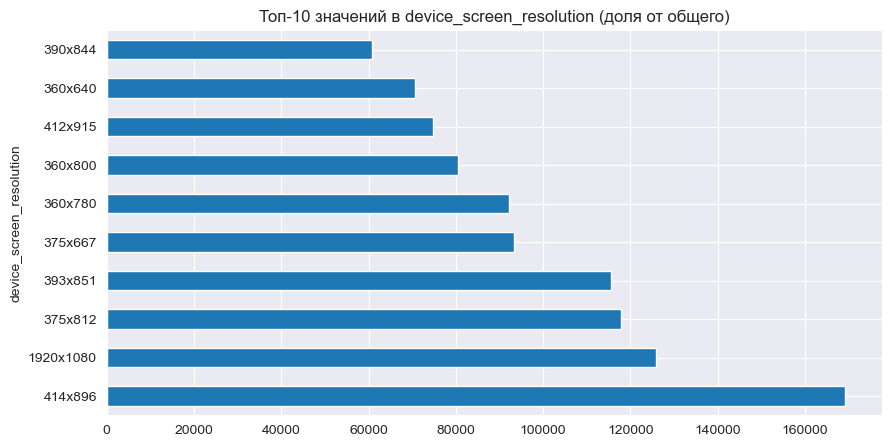

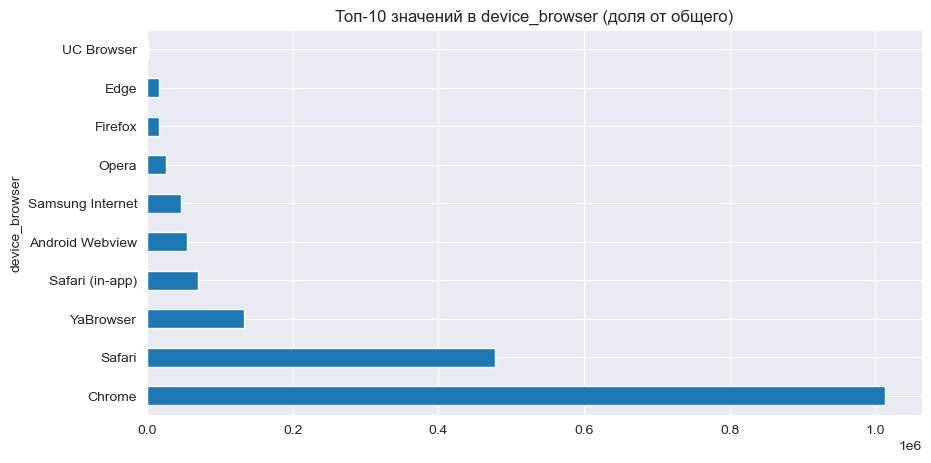

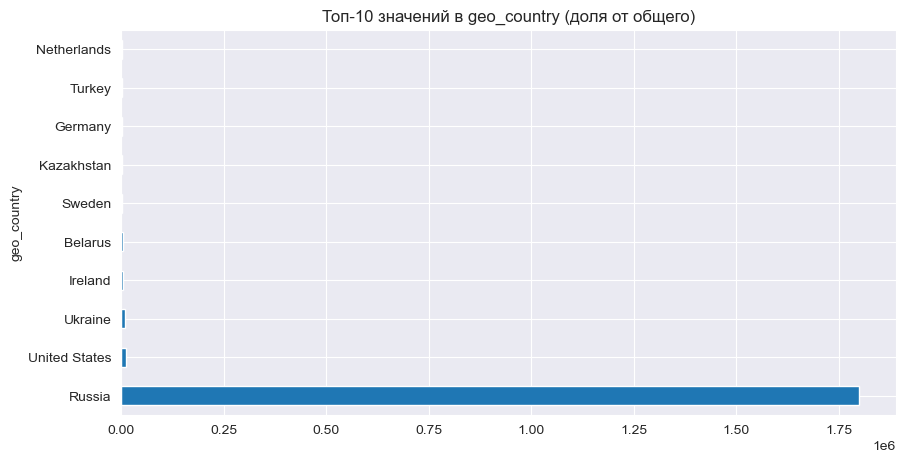

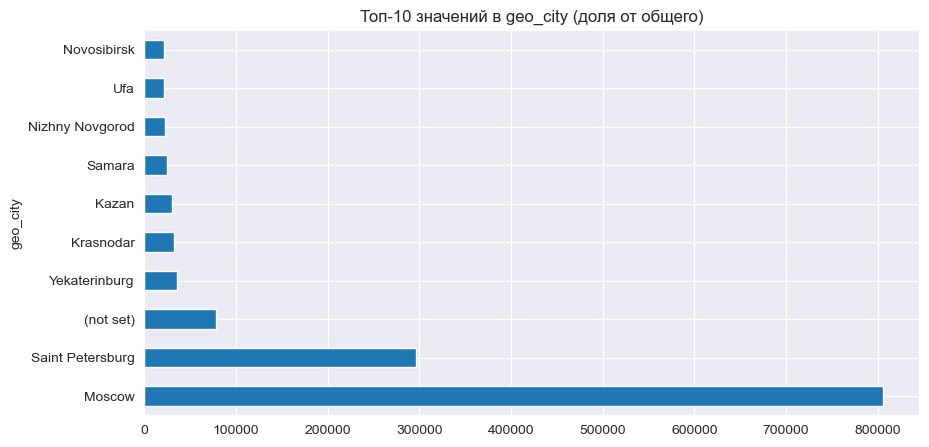

In [102]:
for col in ['utm_medium', 'device_brand', 'device_category', 'device_os', 'device_screen_resolution', 'device_browser','geo_country', 'geo_city']:
    plt.figure(figsize=(10, 5))
    df_copy[col].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
    plt.title(f'Топ-10 значений в {col} (доля от общего)')
    plt.show()

In [103]:
df_copy.geo_country.value_counts()[0]/len(df_copy) * 100

/var/folders/kn/_tgds5451054_0cq0cqj57900000gn/T/ipykernel_5058/2868657628.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_copy.geo_country.value_counts()[0]/len(df_copy) * 100


np.float64(96.8022710348962)

In [104]:
# Так как страна, на которой мы распространяем продукт - Россия и подавляющее большинство строк из России, удаляю все строки, в которых указываются другие страны
df_copy = df_copy[df_copy.geo_country == 'Russia']
df_copy.head(10)

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
session_id,,,,,,,,,,,,
9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,463481,NOBKLgtuvqYWkXQHeYWM,506819,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,463481,1006599,506819,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
9055447192389856083.1622453074.1622453074,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,506819,mobile,iOS,Apple,375x812,Safari,Russia,Saint Petersburg
9055455318486370642.1640843788.1640843788,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,602x1029,YaBrowser,Russia,Saint Petersburg
9055461992850812764.1626107740.1626107740,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,506819,mobile,Android,Samsung,360x640,Chrome,Russia,Saint Petersburg
9055462349345527315.1638536723.1638536723,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,390x844,Safari,Russia,Moscow


In [105]:
df_copy.nunique().sort_values(ascending=False)

device_screen_resolution    4962
utm_keyword                 1211
geo_city                     506
utm_campaign                 386
utm_source                   274
utm_adcontent                267
device_brand                 197
utm_medium                    51
device_browser                30
device_os                      4
device_category                3
geo_country                    1
dtype: int64

In [106]:
top50_keyword = df_copy.utm_keyword.value_counts(ascending=False).head(50).index
top50_resolution = df_copy.device_screen_resolution.value_counts().head(50).index

In [107]:
top50_keyword

Index([                506819, 'puhZPIYqKXeFPaUviSjo', 'aXQzDWsJuGXeBXexNHjc',
       'pHqgLcdBQPSLcrTpLkdr', 'ITfrGJNwVsHBGJMAKoct', 'hAmNSZmQkKQKAjZEGlgb',
       'UKNBOHebRIIsQRsjNKay', 'IGUCNvHlhfHpROGclCit', 'RkpOyeEPgcMBSDuHLQcj',
       'JajANoFxoqXfKRNBUhzx', 'BmOOOIoWGHEfxEfoUezs', 'ZNhSIPchlbnKwZWcsKzz',
       'pucKZkLDtpMDBTobJAJG', 'RrhnkuoaqckNtJpAZDzH', 'YQXPpoLsxnykCWKhGEmI',
       'DBHgBJHOdbPwsRDUbEgX', 'XEayFbemrPYbxFeNbxif', 'tVtbIKrPSOvrXLCznVVe',
       'MWLEpQPyjGkjHseVyeyQ', 'fzbotReoFzSuckjwcpCs', 'COtBsnAzfZyRVtvDlhnW',
       'QYfbqJXuLdJGfOSFgZOs', 'tzIeQUUHahhBuEkJqDVp', 'KCcEkEaKEtUilBVMoCAi',
       'ISrKoXQCxqqYvAZICvjs', 'qxnAydKMtMSuafVrMzdC', 'psjAUzFZVWWCuxgCrtmQ',
       'ObIWuFTMgFPUHNiFoOwb', 'MBHgRPNeTcONuVFFXgmz', 'oKjXDUsycmahkgMhGdAR',
       'qUcotcWimEOQiboVPcCx', 'jfLxUKobDdJlutbwyjaU', 'fkhLOTqvIJxkHksTSIzX',
       'rUCkqFnIxCaJcjmMyyMC', 'AOIxUCLuCjwgydJkOLWI', 'jpZoxCaowxXvglZVUJyq',
       'QVwnwuQeEBRKybYuwqrE', 'DBLWVjTjVZuzWYWTaDfZ

In [108]:
df_copy.device_screen_resolution = df_copy.device_screen_resolution.apply(lambda x: x if x in top50_resolution else 'other')
df_copy.utm_keyword = df_copy.utm_keyword.apply(lambda x: x if x in top50_keyword else 'other')

In [109]:
df_copy.device_screen_resolution.nunique()

51

In [110]:
df_copy.utm_keyword.nunique()

51

In [111]:
df_clean = df_copy.copy()

In [112]:
df_clean.to_csv('data/ga_sessions_clean.csv')

На основе данных визуализаций можно понять огромное количество аспектов для макретинговой аналитики и др.
Но у меня роль является другой, поэтому идём дальше.

Все данные подготовлены, далее у нас идет feauture engineering

In [43]:
# Разработать новые фичи, как пример: is_premium_brand (например эпл, гугл, сони), big_city(больше 1 млн жителей), city_region(в какой части россии находится город)

In [3]:
# df_hits = pd.read_csv('data/ga_hits-001.csv')
df_hits = pd.read_csv('data/ga_hits_clean.csv')
# df_hits.columns
# df_hits.head()
# df_hits = df_hits.drop(['hit_date', 'hit_time', 'hit_number', 'hit_type',
#        'hit_referer', 'hit_page_path', 'event_category',
#        'event_label', 'event_value'], axis=1)
# df_hits.to_csv('data/ga_hits_clean.csv', index=False)

In [4]:
df_clean = pd.read_csv('data/ga_sessions_clean.csv')
df_clean.head()

,session_id,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,463481,NOBKLgtuvqYWkXQHeYWM,506819,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,463481,1006599,506819,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow


In [5]:
df_clean = df_clean.set_index('session_id')
df_hits = df_hits.set_index('session_id')

In [6]:
(df_hits.event_action.value_counts()/len(df_hits)*100).round(2).head()

event_action
view_card              22.63
view_new_card          22.58
sub_landing            11.43
go_to_car_card          6.19
sub_view_cars_click     5.03
Name: count, dtype: float64

In [7]:
df_hits_unique_index = df_hits[~df_hits.index.duplicated(keep='first')]

# Выполнение left join
merged_df = pd.merge(df_clean, df_hits_unique_index, left_index=True, right_index=True, how='left')

# merged_df = pd.merge(df_clean, df_hits, how='inner', on='session_id')
# merged_df = merged_df.drop_duplicates()
# merged_df.head()

In [8]:
merged_df.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action
session_id,,,,,,,,,,,,,
9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust,sub_landing
905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow,sub_landing
9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk,search_form_region
9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,463481,NOBKLgtuvqYWkXQHeYWM,506819,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,sub_landing
9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,463481,1006599,506819,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow,quiz_show


In [9]:
merged_df.shape

(1800469, 13)

In [10]:
premium_brands = ['Apple',
                  'Sony',
                  'Google']

big_cities =['Moscow',
             'Saint Petersburg',
             'Yekaterinburg',
             'Krasnodar',
             'Nizhny Novgorod']

target_list = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']

In [11]:
merged_df.event_action.value_counts()

event_action
sub_landing                  819885
view_card                    257678
view_new_card                135962
sub_view_cars_click          117301
go_to_car_card                48730
                              ...  
greenday_sub_landing              1
click_credit                      1
greenday_sub_submit_error         1
click_sell                        1
close_form                        1
Name: count, Length: 172, dtype: int64

In [12]:
merged_df['big_city'] = merged_df.apply(lambda x: 1 if x.geo_city in big_cities else 0, axis=1)
merged_df['is_premium'] = merged_df.apply(lambda x: 1 if x.device_brand in premium_brands else 0, axis=1)
merged_df['target'] = merged_df.apply(lambda x: 1 if x.event_action in target_list else 0, axis=1)
merged_df = merged_df.drop(['event_action'], axis=1)

In [13]:
# Теперь преобразуем категориальные переменные с помощью OneHotEncoder.
merged_df.columns

Index(['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country', 'geo_city',
       'big_city', 'is_premium', 'target'],
      dtype='object')

In [14]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [15]:
# 1. Сохраняем удаляемые столбцы + индекс
preserved_data = merged_df[['is_premium', 'big_city', 'target']].copy()

In [16]:
X = merged_df.drop(['is_premium', 'big_city', 'target'], axis=1)
ohe_result = ohe.fit_transform(X)

In [17]:
# 3. Создаем DataFrame с тем же индексом
df_ohe = pd.DataFrame.sparse.from_spmatrix(
    ohe_result,
    index=X.index,  # используем индекс исходного X
    columns=ohe.get_feature_names_out(input_features=X.columns)
)

In [18]:
df_ohe = df_ohe.merge(preserved_data, how='inner', on='session_id')
df_ohe.head()

,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_ANoZJgYuPrWNkAAchryx,utm_source_ArbfvYgWhqxkzywKqpQf,utm_source_AuJjYKxJakEqFnCmyFtz,utm_source_BAZCuyHZnaPrMGOMrcCQ,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_BTOBxRcZAuMDAGcpupRx,utm_source_BellrslNBZQZaIxVFGXJ,utm_source_BmzdZLeVUBKtYeegQdDw,...,geo_city_Zhukovskiy,geo_city_Zlatoust,geo_city_Znamenskiy,geo_city_Zvenigorod,geo_city_Тарасовка,geo_city_Тимофеевка,geo_city_Хомутово,is_premium,big_city,target
session_id,,,,,,,,,,,,,,,,,,,,,
9055434745589932991.1637753792.1637753792,0,0,0,0,0,0,0,0,0,0,...,0,1.0,0,0,0,0,0,0,0,0
905544597018549464.1636867290.1636867290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9055446045651783499.1640648526.1640648526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9055447046360770272.1622255328.1622255328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9055447046360770272.1622255345.1622255345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
df_ohe.shape

(1800469, 1824)

In [20]:
# df_ohe.to_csv('data/df_ohe.csv')

In [21]:
X.columns

Index(['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country',
       'geo_city'],
      dtype='object')

Modelling

In [22]:
# Здесь будем делать моделирование нашей модели.

In [23]:
x = df_ohe.drop(['target'], axis=1)
y = df_ohe['target']

In [24]:
models = [
    MLPClassifier(activation='logistic', hidden_layer_sizes=(256, 128, 64), random_state=42),
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_depth=5),
    LogisticRegression(solver='liblinear', random_state=42, max_iter=100),
]


In [25]:
for m in models:
    score = cross_val_score(m, x, y, cv=2, scoring='roc_auc')
    print(f'model: {type(m).__name__}, roc_auc_mean: {score.mean():.4f}, roc_auc_std: {score.std():.4f}')


C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


model: MLPClassifier, roc_auc_mean: 0.5788, roc_auc_std: 0.0650


C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


model: RandomForestClassifier, roc_auc_mean: 0.6121, roc_auc_std: 0.0115


C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\HoroL\anaconda3\envs\myproject\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


model: LogisticRegression, roc_auc_mean: 0.6495, roc_auc_std: 0.0040


Лучше всего себя показала
model: LogisticRegression, roc_auc_mean: 0.6495, roc_auc_std: 0.0040
Так же в процессе выполнения она оказалась самой быстрой из всех моделей.